<a href="https://colab.research.google.com/github/vb9869/EDA_HOTEl_BOOKING_ANALYSIS/blob/main/EDA_hotel_BOOKING_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Mounting drive and read the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Hotel Booking EDA ANALYSIS Project/Hotel Bookings.csv')

In [4]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
data.shape

(119390, 32)

In [7]:
print('Number of rows present in our data : ', data.shape[0])
print('Number of columns present in our data : ', data.shape[1])

Number of rows present in our data :  119390
Number of columns present in our data :  32


In [8]:
pd.Series(data.columns.tolist())

0                              hotel
1                        is_canceled
2                          lead_time
3                  arrival_date_year
4                 arrival_date_month
5           arrival_date_week_number
6          arrival_date_day_of_month
7            stays_in_weekend_nights
8               stays_in_week_nights
9                             adults
10                          children
11                            babies
12                              meal
13                           country
14                    market_segment
15              distribution_channel
16                 is_repeated_guest
17            previous_cancellations
18    previous_bookings_not_canceled
19                reserved_room_type
20                assigned_room_type
21                   booking_changes
22                      deposit_type
23                             agent
24                           company
25              days_in_waiting_list
26                     customer_type
2

In [9]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
x = (data.select_dtypes(include = 'number').columns)
print('Number of numeric columns : ', len(x))

Number of numeric columns :  20


In [11]:
y = (data.select_dtypes(include = 'object').columns)
print('Number of categorical columns : ', len(y))

Number of categorical columns :  12


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [14]:
data.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [15]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
data.drop(['company'],axis = 1, inplace = True)

In [17]:
data.dropna(subset = ['country','children'], axis = 0, inplace = True)

In [18]:
data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16004
days_in_waiting_list                  0


In [19]:
data['agent'].fillna(data['agent'].mean(), inplace = True)

In [20]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [21]:
data.shape

(118898, 31)

In [22]:
data[data.duplicated()].shape

(31965, 31)

In [23]:
data.drop_duplicates(inplace = True)

In [24]:
data.shape

(86933, 31)

### Data Visualization

#### Univariate analysis
The most basic type of data analysis is univariate analysis.Because "uni" implies "one," your data only has one variable.It does not deal with causes or relationships (unlike regression) and its primary goal is to describe; it gathers data, summarises it, and looks for patterns.

In [25]:
data['hotel'].value_counts()

City Hotel      53416
Resort Hotel    33517
Name: hotel, dtype: int64

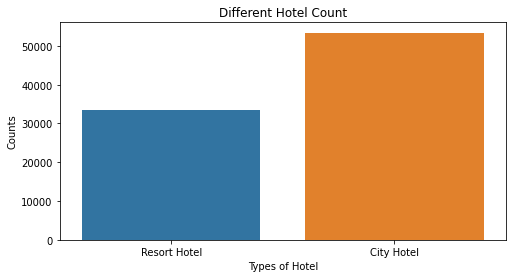

In [26]:
plt.figure(figsize = (8,4))

sns.countplot(data['hotel'])

plt.title('Different Hotel Count')
plt.xlabel('Types of Hotel')
plt.ylabel('Counts')

plt.show()

## Inference:

* City hotel has more number of cancellation which is about 16000 and Resort Hotel as less cancellation which is less than 8000 which is about almost 50%



In [27]:
data['is_canceled'].value_counts()

0    62946
1    23987
Name: is_canceled, dtype: int64

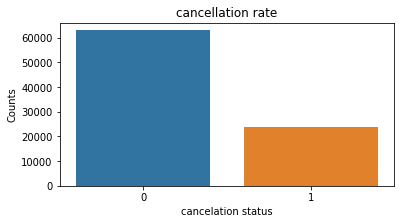

In [28]:
plt.figure(figsize = (6,3))

sns.countplot(data['is_canceled'])

plt.title('cancellation rate')
plt.xlabel('cancelation status')
plt.ylabel('Counts')

plt.show()

## Inference :
0 ---> Non Cancelled Booking | 1 ---> Cancelled Booking

Hotels are less canceled as compare to cancellation bar



In [29]:
data['market_segment'].value_counts()

Online TA        51540
Offline TA/TO    13857
Direct           11647
Groups            4937
Corporate         4027
Complementary      698
Aviation           227
Name: market_segment, dtype: int64

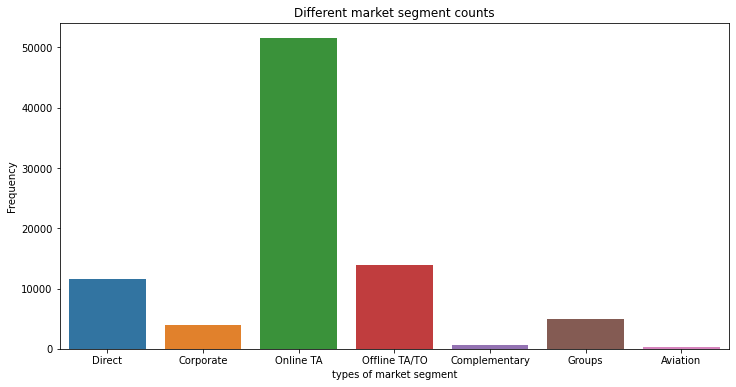

In [30]:
plt.figure(figsize = (12,6))

sns.countplot(data['market_segment'])

plt.title('Different market segment counts')
plt.xlabel('types of market segment')
plt.ylabel('Frequency')

plt.show()

## Observation:

Online TA --> Online Travel Agent Offline TA/TO--> Offline Travel Agent and Travel Operator

Online TA and Offline TA/TO has made the maximum number of hotel bookings



### Feature Engineering

In [ ]:
#data['total_children'] = data['children'] + data['babies']

In [ ]:
#data['total_visitores'] = data['total_children'] + data['adults']

In [ ]:
#data.drop(['children','babies'], axis = 1, inplace = True)

## Bivariate analysis: 

* The analysis of bivariate data is known as bivariate analysis.It is one of the most basic types of statistical analysis, and it is used to determine whether two sets of values have a relationship.The variables X and Y are generally involved.